In [43]:
# import necessary libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [44]:
# load the dataset
original_data = pd.read_csv("C:\\Users\\Student\\Documents\\Student Perfomance Dataset Folder\\StudentsPerformance.csv")
#Use copy of the data
data_copy = original_data

In [45]:
#See a sample of the data 
data_copy.sample(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
628,male,group D,some college,free/reduced,none,49,57,46
715,female,group B,associate's degree,free/reduced,completed,76,94,87
633,female,group C,high school,standard,none,75,88,85
761,female,group D,some high school,standard,none,48,58,54
231,male,group C,associate's degree,standard,none,46,43,42
729,male,group C,some college,standard,none,53,39,37
358,male,group D,some college,free/reduced,none,59,62,61
31,female,group B,some college,standard,none,63,65,61
305,male,group A,some college,standard,none,69,67,69
167,female,group B,master's degree,free/reduced,completed,58,76,78


In [46]:
# Check null values
print(pd.isnull(data_copy).sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [47]:
#Categorical features are: gender, race, parental level of education, lunch & test preparation course

In [48]:
#Chech info about dataset
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [49]:
for col in data_copy.columns:
    if data_copy[col].dtype == "object":
        print("Current Column: {}".format(col))
        print(data_copy[col].value_counts())
        print("=" * 26)
        print("\n")

Current Column: gender
gender
female    518
male      482
Name: count, dtype: int64


Current Column: race/ethnicity
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64


Current Column: parental level of education
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


Current Column: lunch
lunch
standard        645
free/reduced    355
Name: count, dtype: int64


Current Column: test preparation course
test preparation course
none         642
completed    358
Name: count, dtype: int64




In [50]:
#Describe the dataset (numerical features only)
data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [51]:
# Passing score 
Passing_mark = 50
# Average of Total score 
data_copy["Total_score"] = round((data_copy["math score"] + data_copy["reading score"] + data_copy["writing score"]) /3 , 2)

In [52]:
# Add a column for fail and pass
data_copy["Did_pass"] = False
data_copy["Did_pass"] = data_copy["Total_score"] > Passing_mark 

In [53]:
data_copy["Did_pass"].value_counts()

Did_pass
True     891
False    109
Name: count, dtype: int64

In [54]:
#This dataset is quite skewed in the scenario that there are very little students who failed, so maybe I should lower the passing score
#to get a more accurate representation

In [55]:
#Display first 5 rows of dataset
data_copy.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Did_pass
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,True
1,female,group C,some college,standard,completed,69,90,88,82.33,True
2,female,group B,master's degree,standard,none,90,95,93,92.67,True
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,False
4,male,group C,some college,standard,none,76,78,75,76.33,True


In [56]:
# Create a helper fucntion that count number of passed based on a certain column 
def get_passed(column, condition, dataFrame):
    res = 0
    res = len(dataFrame[dataFrame[column] == condition].loc[dataFrame["Did_pass"] == True])
    
    return res

In [57]:
#Data Visualization

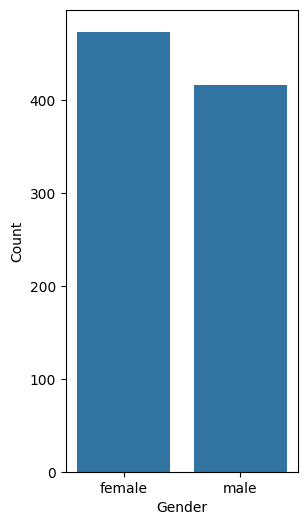

In [58]:
#Plot the graph between gender and student passed
plt.figure(figsize = (3,6))
sns.countplot(x = "gender", data = data_copy[data_copy["Did_pass"] == True])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [59]:
males_who_passed = get_passed("gender", "male", data_copy)
females_who_passed = get_passed("gender", "female", data_copy)
print("Number of males who passed: {}".format(males_who_passed))
print("Number of females who passed: {}".format(females_who_passed))

Number of males who passed: 417
Number of females who passed: 474


In [60]:
#So females are more likely to pass

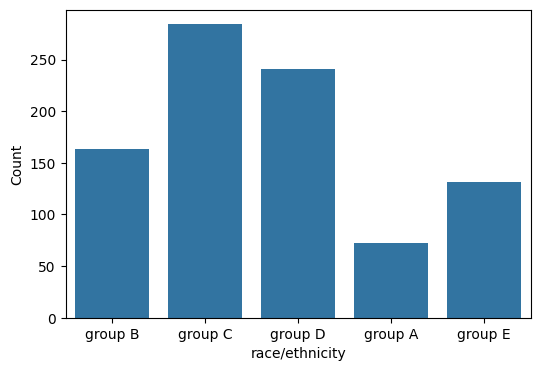

In [61]:
# lets analyze the ethnicity/ race category 
plt.figure(figsize = (6,4))

sns.countplot(x = "race/ethnicity", data = data_copy[data_copy["Did_pass"] == True])
plt.xlabel("race/ethnicity")
plt.ylabel("Count")
plt.show()

In [62]:
for race in data_copy["race/ethnicity"].unique():
    print("Number of people passed, {} are from race: {}".format(race, get_passed("race/ethnicity", race, data_copy)))

Number of people passed, group B are from race: 163
Number of people passed, group C are from race: 284
Number of people passed, group A are from race: 72
Number of people passed, group D are from race: 241
Number of people passed, group E are from race: 131


In [63]:
#Looks like people from group C are more likely to pass exams

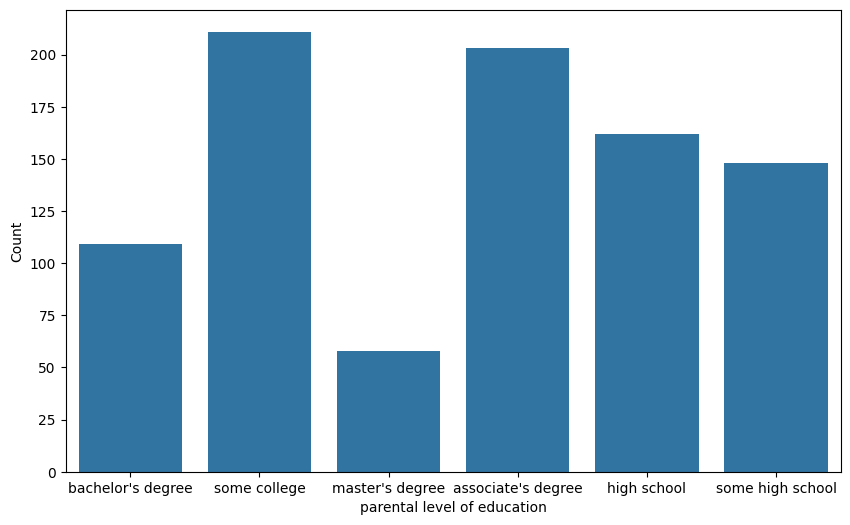

In [64]:
# ploting the graph between parental level of education and student passed

plt.figure(figsize = (10,6))
sns.countplot(x = "parental level of education", data = data_copy[data_copy["Did_pass"] == True])

plt.xlabel("parental level of education")
plt.ylabel("Count")
plt.show()

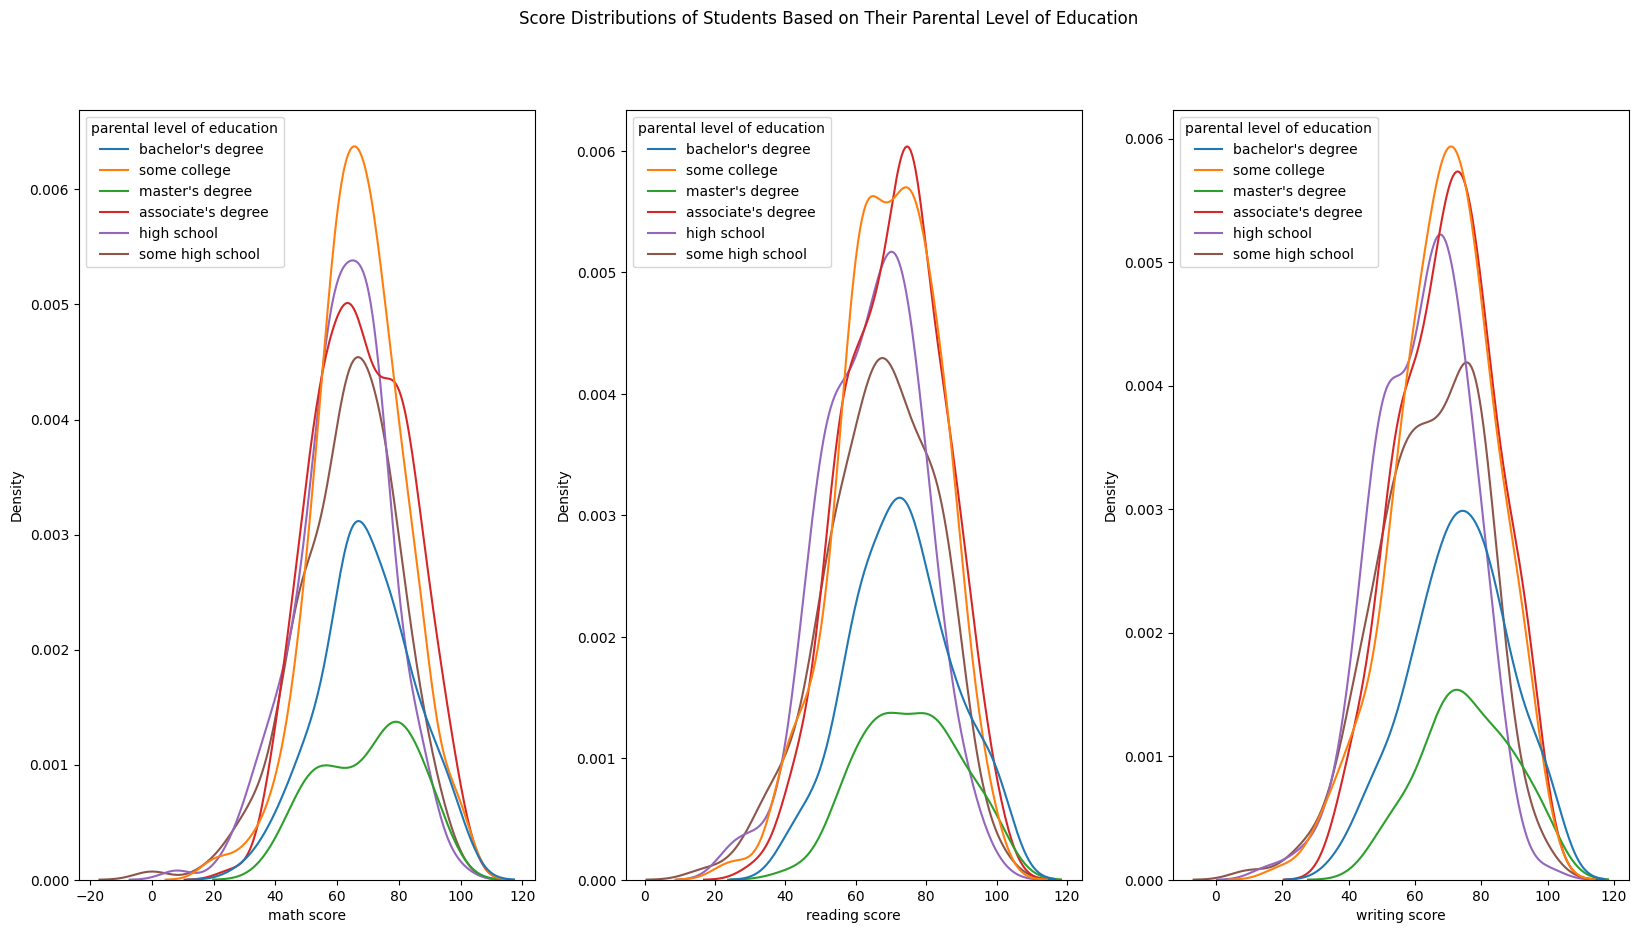

In [65]:
fig, ax=plt.subplots(ncols=3, figsize=(20,10))
fig.suptitle('Score Distributions of Students Based on Their Parental Level of Education')
a=sns.kdeplot(data=data_copy,x='math score',ax=ax[0], hue='parental level of education')
b= sns.kdeplot(data=data_copy, x='reading score', ax=ax[1], hue='parental level of education')
c= sns.kdeplot(data=data_copy, x='writing score', ax=ax[2], hue='parental level of education')

sns.move_legend(a, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(b, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(c, "upper left", bbox_to_anchor=(0, 1))

In [66]:
for edu in data_copy["parental level of education"].unique():
    print("Parents of: {}  passed student are from {}".format(get_passed("parental level of education", edu, data_copy), edu))

Parents of: 109  passed student are from bachelor's degree
Parents of: 211  passed student are from some college
Parents of: 58  passed student are from master's degree
Parents of: 203  passed student are from associate's degree
Parents of: 162  passed student are from high school
Parents of: 148  passed student are from some high school


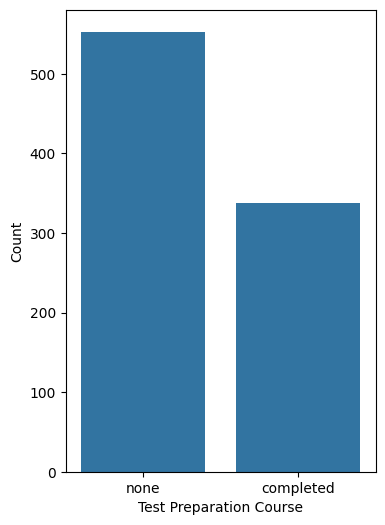

In [67]:
# ploting the graph between test preparation course and student passed
plt.figure(figsize = (4,6))
sns.countplot(x = "test preparation course", data = data_copy[data_copy["Did_pass"] == True])

plt.xlabel("Test Preparation Course")
plt.ylabel("Count")
plt.show()

In [68]:
for edu in data_copy["test preparation course"].unique():
    print("Number of student passed: {} have done {}".format(get_passed("test preparation course", edu, data_copy), edu))

Number of student passed: 553 have done none
Number of student passed: 338 have done completed


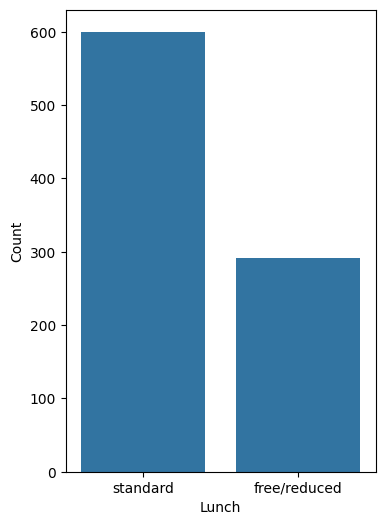

In [69]:
# ploting the graph between student taking lunch and getting passed
plt.figure(figsize = (4,6))
sns.countplot(x = "lunch", data = data_copy[data_copy["Did_pass"] == True])

plt.xlabel("Lunch")
plt.ylabel("Count")
plt.show()

In [70]:
for edu in data_copy["lunch"].unique():
    print("Number of student passed: {} are taking {} lunch".format(get_passed("lunch", edu, data_copy), edu))
data_copy['lunch'].value_counts()

Number of student passed: 600 are taking standard lunch
Number of student passed: 291 are taking free/reduced lunch


lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [71]:
#Most of students are eating standard lunch